In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns


In [3]:
data_df = pd.read_csv('train.csv')

In [4]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
features = ["Survived" , "Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare" , "Cabin"]

data_df[features].head(10)

In [6]:
data_df[features].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4 . Feature Engineering and Data Wrangling

## Name

In [8]:
data_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [11]:
# regax 101 
# https://regex101.com/

In [38]:
# Đoạn này dùng để tách các cái như kiểu MR . MISS , MRS... ra để xác định chức vụ các thứ 

import re

def extract_title(name):
    p =re.compile(r",(.+)\.") 
    return p.search(name).groups(1)[0].strip()

data_df['Title'] = data_df['Name'].apply(lambda name : extract_title(name))

data_df['Title'].value_counts() 


Title
Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: count, dtype: int64

In [39]:
# Ở trên có đoạn Mrs. Martin (Elizabeth L  bị lỗi  nên đoạn này bóc ra để xem kĩ hơn

In [37]:
"""for i in range(0,len(data_df['Title']),1) :
    if data_df['Title'][i] ==  "Mrs. Martin (Elizabeth L":
        print (data_df['Name'][i])""" # cach 1 

# cach 2 
data_df['Name'][data_df['Name'].str.contains("Mrs. Martin")] 
        

513    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [29]:
# mang qua regax101 check var 

In [41]:
import re

def extract_title(name):
    p =re.compile(r",([\w\s]+)\.") # cái này hơi nhức đầu 
    return p.search(name).groups(1)[0].strip()

data_df['Title'] = data_df['Name'].apply(lambda name : extract_title(name))

data_df['Title'].value_counts() 

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [45]:
# Mở tập test ra 
test_df = pd.read_csv('test.csv')

In [46]:
test_df.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [47]:
test_df['Title']= test_df['Name'].apply(lambda name :extract_title(name))

In [50]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [51]:
# vẽ ra để xemm 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

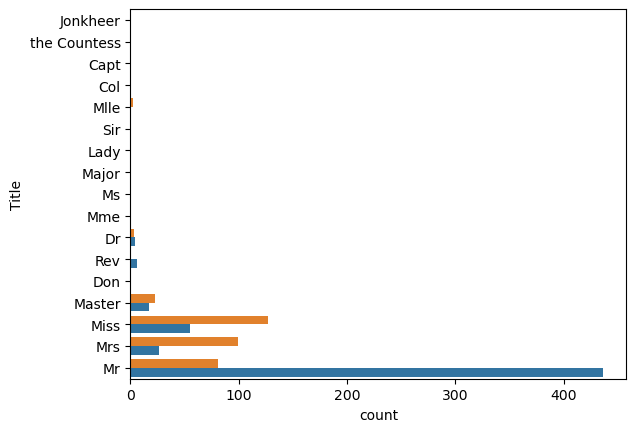

In [67]:
sns.countplot(data = data_df  , y = 'Title'  , hue='Survived')
;

In [68]:
# mấy cái kia quá ít nên group lại

In [71]:
def group_title(title):
    if title in ['Mr' , 'Mrs' , 'Miss', 'Master']:
        return title 
    elif title =='Ms':
        return 'Miss'
    else :
        return 'Orthers'

data_df['Title'] = data_df['Title'].apply(lambda title : group_title(title))
data_df['Title'].value_counts()

Title
Mr         517
Miss       183
Mrs        125
Master      40
Orthers     26
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

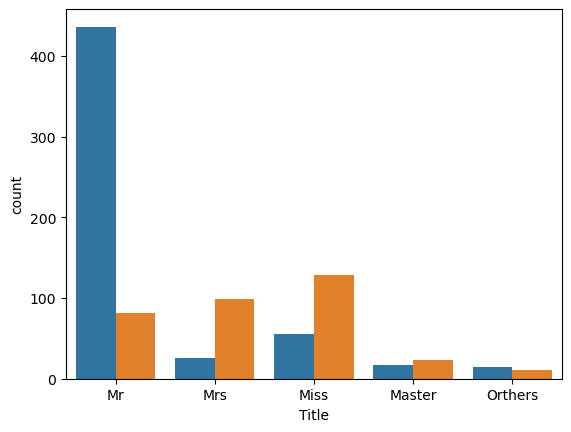

In [74]:
sns.countplot(data = data_df , x = 'Title' , hue = 'Survived'  )

##  Family 
- SibSp and Parch

In [86]:
data_df['Family_size'] = data_df['SibSp'].astype('int')+ data_df['Parch'].astype('int')+1

In [87]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + data_df['Parch'].astype('int')+1

AttributeError: 'numpy.int64' object has no attribute 'startswith'

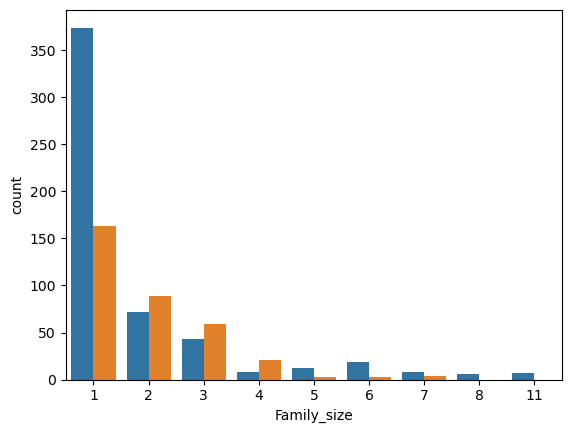

In [88]:
#import matplotlib.pyplot as plt

sns.countplot(data = data_df , x = 'Family_size' , hue ='Survived')

#pltt.legend(title = 'Survived', labels = ['Not Survived' , 'Survived'])

#pltt.show()

In [92]:
data_df['Family_cut'] = pd.cut(data_df['Family_size'] , bins =[0,1,4,6,10], labels=['Solo', 'Small' , 'Medium', 'Large'])

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

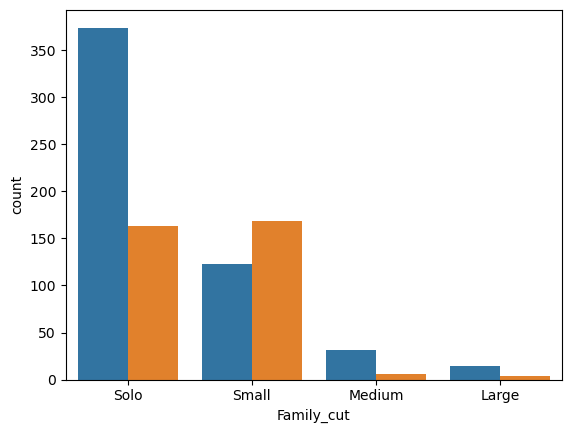

In [93]:
sns.countplot(data= data_df , x = 'Family_cut' , hue = 'Survived')

## 4.2 Data Wrangling 

In [94]:
num_features = ['Age', 'Fare']

In [100]:
cat_features = ['Sex' , 'Pclass' , 'Embarked', 'Title' , 'Family_cut']

In [101]:
feature_cols = num_features + cat_features

In [102]:
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cut']


In [115]:
def display_missing (df , feature_cols):
    n_rows = df.shape[0] 
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0 :
            print (f"Col {col} has {missing_count} missing values .")
            print (f"Col {col} has {missing_count*100 / n_rows :.2f} % missing values")
display_missing(data_df , feature_cols)

Col Age has 177 missing values .
Col Age has 19.87 % missing values
Col Embarked has 2 missing values .
Col Embarked has 0.22 % missing values
Col Family_cut has 7 missing values .
Col Family_cut has 0.79 % missing values


In [116]:
# Filling missing values 

In [117]:
# Age : filling missing values with 'median' of dataset 

In [118]:
# C2: Tìm cột tương đồng 

In [133]:
age_by_sex_and_pclass = data_df.groupby(['Sex' ,'Pclass'])['Age'].median()


In [135]:
age_by_sex_and_pclass
#so với lấy trung bình thông thường thì lấy giá trị trung bình theo đối tượng là sex và pclass sẽ chính xác hơn 
# vì age ở mỗi giới tính không giống nhau và age ở mỗi class cũng không giống nhau 

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [136]:
data_df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [162]:
sex = data_df['Sex'].unique()  # Không có tác dụng lắm chỉ là hàm unique() liệt kê các giá trị khác nhau 

In [164]:
pclass = data_df['Pclass'].unique() 

In [165]:
age_by_sex_and_pclass['male',1] # như mảng 2 chiều 

40.0

In [168]:
print(len(data_df['Age']))

891


In [189]:
for i in range(0 , 10 , 1):
    print(data_df['Age'][i])
    #if data_df['Age'][i] == 'nan' :
     #   print(data_df['Age'][i])
        #data_df['Age'][i] = age_by_sex_and_pclass[data_df['Sex'][i], data_df['Pclass'][i]]

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [181]:
data_df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [217]:
nan_age = np.where(np.isnan(data_df['Age'])) # tìm các giá trị bị Nan trong cột Age
# nếu mà thêm [0] thì trả về 1 mảng
# còn không thì trả về 1 dãy ( 1 mảng n mà chỉ có 1 phần tử )

In [219]:
print(len(nan_age))

1


In [220]:
nan_age = np.where(np.isnan(data_df['Age']))[0] # tìm các giá trị bị Nan trong cột Age

In [221]:
print(len(nan_age))

177


In [236]:

for i in nan_age :
    
    #print (data_df['Sex'][i] , data_df['Pclass'][i])
    data_df.loc[i,'Age']= age_by_sex_and_pclass[data_df['Sex'][i]][data_df['Pclass'][i]]
    #phải là iloc[i,'Age'] mới không bị lỗi sao chép dữ liệu 

In [237]:
data_df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [241]:
data_df['Embarked'].isnull().sum()

2

In [244]:
display_missing(data_df, feature_cols)

Col Embarked has 2 missing values .
Col Embarked has 0.22 % missing values
Col Family_cut has 7 missing values .
Col Family_cut has 0.79 % missing values


In [245]:
#còn 2 dữ liệu còn lại bị missing ít nên dùng tool

In [250]:
X = data_df[feature_cols]

In [251]:
Y = data_df['Survived']

In [253]:
X_tests = test_df[feature_cols]
#quên chưa xứ lí file test

KeyError: "['Family_cut'] not in index"

In [255]:
display_missing(test_df , feature_cols)

Col Age has 86 missing values .
Col Age has 20.57 % missing values
Col Fare has 1 missing values .
Col Fare has 0.24 % missing values


KeyError: 'Family_cut'

In [256]:
test_df['Family_cut'] = pd.cut(test_df['Family_size'] , bins =[0,1,4,6,10], labels=['Solo', 'Small' , 'Medium', 'Large'])

In [259]:
display_missing(test_df , feature_cols)

Col Age has 86 missing values .
Col Age has 20.57 % missing values
Col Fare has 1 missing values .
Col Fare has 0.24 % missing values
Col Family_cut has 1 missing values .
Col Family_cut has 0.24 % missing values


In [260]:
age_by_sex_and_pclass_test = test_df.groupby(['Sex' ,'Pclass'])['Age'].median()


In [261]:
age_by_sex_and_pclass_test

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [262]:
nan_age_test = np.where(np.isnan(test_df['Age']))[0] # tìm các giá trị bị Nan trong cột Age

In [263]:

for i in nan_age_test :
    
    #print (data_df['Sex'][i] , data_df['Pclass'][i])
    test_df.loc[i,'Age']= age_by_sex_and_pclass_test[test_df['Sex'][i]][test_df['Pclass'][i]]
    #phải là iloc[i,'Age'] mới không bị lỗi sao chép dữ liệu 

In [266]:
display_missing(test_df , feature_cols)

Col Fare has 1 missing values .
Col Fare has 0.24 % missing values
Col Family_cut has 1 missing values .
Col Family_cut has 0.24 % missing values


In [267]:
# xử lí test xong r

In [269]:
X_test = test_df[feature_cols]

In [270]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [271]:
from sklearn.impute import SimpleImputer

In [272]:
from sklearn.pipeline import Pipeline

In [273]:
num_transformer = Pipeline(steps =[
    ('imputer' , SimpleImputer( strategy='median')),
    ('scaler' , StandardScaler)
])

In [274]:
cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer( strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [278]:
preprocessor = ColumnTransformer(transformers = [
    ('num' , num_transformer, num_features) , 
    ('cat' , cat_transformer, cat_features)
])

NameError: name 'ColumnTransformer' is not defined

In [279]:
from sklearn.compose import ColumnTransformer


In [282]:
preprocessor = ColumnTransformer(transformers = [
    ('num' , num_transformer, num_features) , 
    ('cat' , cat_transformer, cat_features)
])
preprocessor.fit(X)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [290]:
X = preprocessor.transform(X).toarray()  # Nếu kết quả là Sparse Matrix


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [283]:
data_df['Embarked'].head(20)

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
17    S
18    S
19    C
Name: Embarked, dtype: object

In [286]:
 data_df_fill = data_df.fillna(data_df.model().iloc[0])

AttributeError: 'DataFrame' object has no attribute 'model'